In [1]:
import pickle
import sncosmo
import numpy as np
import lsst.daf.base as dafBase
import lsst.daf.persistence as dafPersist

import re

import lsst.afw.display.ds9 as ds9

In [2]:
f = open('/renoir_data_02/jpreyes/lsst_data/sn_control/J_A+A_523_A7_table10.dat.txt','r')
data = f.read()

In [3]:
m = re.search('^06D3ed\\|r\\|(.*?)\\|(.*?)\\|', data, re.MULTILINE)
m.group(0)

'06D3ed|r|53848.44| 2.2208E+01|'

In [4]:
m = re.findall('^06D3ed\\|r\\|(.*?)\\|(.*?)\\|(.*?)$', data, re.MULTILINE)

In [35]:
m

[('53848.44', ' 2.2208E+01', '1.7496E+01'),
 ('53851.40', '-2.4950E+00', '1.1670E+01'),
 ('53855.39', ' 1.0116E+02', '1.1175E+01'),
 ('53859.34', ' 3.4512E+02', '1.3579E+01'),
 ('53875.50', ' 1.5777E+03', '2.5646E+01'),
 ('53879.29', ' 1.5391E+03', '1.3467E+01'),
 ('53883.37', ' 1.3322E+03', '1.3645E+01'),
 ('53888.38', ' 1.0459E+03', '1.4615E+01'),
 ('53892.35', ' 8.0764E+02', '1.5275E+01'),
 ('53906.35', ' 2.8785E+02', '1.4632E+01'),
 ('53911.28', ' 2.2692E+02', '1.2566E+01'),
 ('53916.34', ' 1.6688E+02', '1.5950E+01'),
 ('53919.31', ' 1.1853E+02', '1.6650E+01'),
 ('53935.34', ' 9.9543E+01', '2.2504E+01'),
 ('53939.28', ' 8.9745E+01', '1.2964E+01'),
 ('53943.32', ' 6.5050E+01', '1.6316E+01')]

In [44]:
for mjd, flux, error in m:
    print float(mjd), float(flux), float(error)

53848.44 22.208 17.496
53851.4 -2.495 11.67
53855.39 101.16 11.175
53859.34 345.12 13.579
53875.5 1577.7 25.646
53879.29 1539.1 13.467
53883.37 1332.2 13.645
53888.38 1045.9 14.615
53892.35 807.64 15.275
53906.35 287.85 14.632
53911.28 226.92 12.566
53916.34 166.88 15.95
53919.31 118.53 16.65
53935.34 99.543 22.504
53939.28 89.745 12.964
53943.32 65.05 16.316


In [47]:
from astropy.table import Table
bandpasses = ['r']
  
        
lightcurve = {}
lightcurve['bandpass'] = []
lightcurve['mjd'] = []
#lightcurve['ra'] = []
#lightcurve['dec'] = []
lightcurve['flux'] = []
lightcurve['flux_error'] = []
lightcurve['zp'] = []
lightcurve['zpsys'] = []


for mjd, flux, error in m:

    #print 'yep',visit
    lightcurve['bandpass'].append(str('sdss' + bandpasses[0]))
    lightcurve['mjd'].append(float(mjd))
    #lightcurve['ra'].append(src['coord_ra'])
    #lightcurve['dec'].append(src['coord_dec'])
    lightcurve['flux'].append(float(flux))
    lightcurve['flux_error'].append(float(error))
    #lightcurve['flux'].append(src['base_CircularApertureFlux_12_0_flux'])
    #lightcurve['flux_error'].append(src['base_CircularApertureFlux_12_0_fluxSigma'])
    lightcurve['zp'].append(25.0)
    lightcurve['zpsys'].append('ab')
    
lightcurve = Table(data=lightcurve)

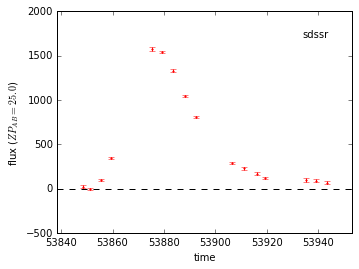

In [48]:
%matplotlib inline
fig = sncosmo.plot_lc(lightcurve, color='red', xfigsize=10)